In [ ]:
 import sklearn
from sklearn.datasets import fetch_openml
from sklearn import metrics
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [ ]:
mnist = fetch_openml("mnist_784")

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
mnist.DESCR

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

In [ ]:
X = mnist.data
Y = mnist.target


In [ ]:
X.shape #the MNIST dataset consists of 70000, 28 by 28 black and white images.

(70000, 784)

In [ ]:
 X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=1)

Decision Tree Classifier

In [ ]:
clf = DecisionTreeClassifier(max_depth=10, random_state = 1)

clf = clf.fit(X_train, Y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
acc_train=metrics.accuracy_score(Y_train, y_pred_train)
acc_test=metrics.accuracy_score(Y_test, y_pred_test)
print("Decision Tree: Accuracy on train {:.3}, test {:.3}".format(acc_train, acc_test))

Decision Tree: Accuracy on train 0.906, test 0.848


Deep Learning

torch.Size([1, 28, 28])
<class 'torch.Tensor'>
max 0.5
min -0.5


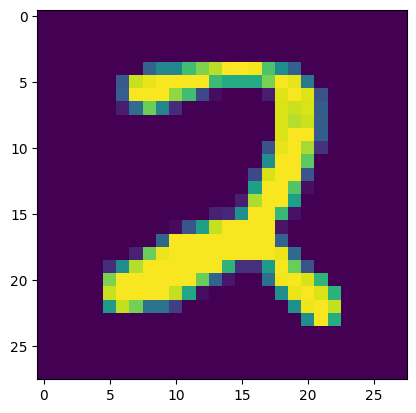

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
from PIL import Image as im
import matplotlib.pyplot as plt


class mnistDataset(Dataset):

    def __init__(self, X,Y):
        self.X  = X.to_numpy()
        self.Y = Y.to_numpy().astype(np.int64)


    def __len__(self):
        return len(self.X)


    def __getitem__(self, item):

        sample = self.X[item]
        target = self.Y[item]

        z= (torch.tensor(sample).float())/255 - 0.5
        z= torch.reshape(z, (1, 28, 28))


        return (z, torch.tensor(target).long())

train = mnistDataset(X_train,Y_train)
batch_size =64
dt= train[9]
print(dt[0].shape)
print(type(dt[1]))
b = dt[0]
b = torch.reshape(b, (28,28))
nump_b = b.numpy()
print("max", np.max(nump_b))
print("min", np.min(nump_b))
plt.imshow(b.numpy())
plt.show()






In [ ]:
trainloader = torch.utils.data.DataLoader(train, batch_size=batch_size,
                                          shuffle=True)
test = mnistDataset(X_test, Y_test)
testloader = torch.utils.data.DataLoader(test, batch_size = batch_size)


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 8, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(8*12*12, 10)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        #print("Input", x.size())
        x = self.conv1(x)
        #print("after conv", x.size())
        x=F.relu(x)
        x=self.pool(x)
        #print("after pool", x.size())
        bsize = x.size()[0]
        x= torch.reshape(x,(bsize, 8*12*12))
        x = self.fc1(x)
        #print("after linear", x.size())

        """
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        """
        return x


net = Network()

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 200 == 199:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,   200] loss: 0.204
[1,   400] loss: 0.090
[1,   600] loss: 0.049
[2,   200] loss: 0.038
[2,   400] loss: 0.032
[2,   600] loss: 0.030
[3,   200] loss: 0.028
[3,   400] loss: 0.026
[3,   600] loss: 0.026
[4,   200] loss: 0.022
[4,   400] loss: 0.022
[4,   600] loss: 0.022
[5,   200] loss: 0.021
[5,   400] loss: 0.019
[5,   600] loss: 0.019
[6,   200] loss: 0.017
[6,   400] loss: 0.017
[6,   600] loss: 0.017
[7,   200] loss: 0.016
[7,   400] loss: 0.015
[7,   600] loss: 0.015
[8,   200] loss: 0.015
[8,   400] loss: 0.014
[8,   600] loss: 0.013
[9,   200] loss: 0.013
[9,   400] loss: 0.013
[9,   600] loss: 0.013
[10,   200] loss: 0.012
[10,   400] loss: 0.011
[10,   600] loss: 0.013
Finished Training


In [ ]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest probability is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the test images: {100 * correct // total} %')
print(total)

Accuracy of the network on the test images: 96 %
23100
